In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple linear regression

A linear regression model finds weights for a linear combination of features:
$$
y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \pmb{w} \pmb{X}
$$

The direct solution for linear regression (called **Normal Equation**) is:
$$
\hat{\pmb{w}} = (\pmb{X}^T \pmb{X})^{-1} \pmb{X}^T \pmb{y}
$$

For predictions based on $ \hat{\pmb{w}} $,
$$
\hat{y} = \hat{\pmb{w}} \pmb{X}
$$

The mean squared error is then
$$
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

In [198]:
# Example from Aurelien Geron's bookS
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [199]:
# Compute the linear regression coefficients using the normal equation
X_mod = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that we also calculate w0
w_NE = np.linalg.inv(X_mod.T.dot(X_mod)).dot(X_mod.T).dot(y) # weights using the normal equation
w_NE

array([[3.92259893],
       [3.14286917]])

In [200]:
# Making predictions using the weights from the normal equation
X_test = np.array([[0], [2]])
X_test_mod = np.c_[np.ones((2, 1)), X_test] # add x0 = 1 to each instance so that we also calculate w0
y_predict = X_test_mod.dot(w_NE)
y_predict

array([[ 3.92259893],
       [10.20833727]])

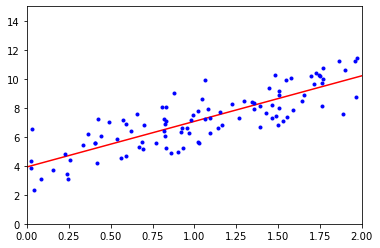

In [201]:
plt.plot(X_test, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [202]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92259893]), array([[3.14286917]]))

In [203]:
X_test = np.linspace(0, 2, 100).reshape(100, 1)
y_predict = lin_reg.predict(X_test)

In [204]:
# Calculate the mean squared error
y_test = 4 + 3 * X_test + np.random.randn(100, 1)
mean_squared_error = np.mean((y_predict - y_test) ** 2)
mean_squared_error

0.8956100335713498

## Linear regression with gradient descent 

In gradient descent alogrithms, the weights are updated using the gradient of the cost function. The weight update equation is given by:
$$
\pmb{w}_{i+1} = \pmb{w}_{i} - \eta \nabla_{\pmb{w}} MSE(\pmb{w}_{i})
$$
where $ \eta $ is the learning rate and the gradient of the cost function is:
$$
\nabla_{\pmb{w}} MSE(\pmb{w}_{i}) = \frac{2}{m} \pmb{X}^T \pmb{X} \pmb{w}_{i} - \pmb{X}^T \pmb{y}
$$
where $ m $ is the number of training examples.

In [205]:
# Define X and y again for clarity
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Modify X to add a column of ones for the intercept
X_mod = np.c_[np.ones((100, 1)), X]

# Define X_test
X_test = np.array([[0], [2]])
X_test_mod = np.c_[np.ones((2, 1)), X_test]

In [206]:
eta = 0.1
n_iterations = 1000
m = 100

w = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_mod.T.dot(X_mod.dot(w) - y)
    w = w - eta * gradients

In [207]:
print("The final weights are:\n", w)

The final weights are:
 [[3.89042451]
 [3.08717791]]


In [208]:
print("The predicted y values are:\n", X_test_mod.dot(w))

The predicted y values are:
 [[ 3.89042451]
 [10.06478032]]


To investigate the effect of the learning rate $\eta$ on the convergence of the gradient descent algorithm, we can plot the predicted values of the model and see how the weights converge with the number of iterations.

In [209]:
w_path = []
def plot_gradient_descent(w, eta, w_path=None):
    m = len(X_mod)
    plt.plot(X, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y")
    n_iterations = 1000
    for i in range(n_iterations):
        if i < 10:
            y_predict = X_test_mod.dot(w)
            style = "r-" if i > 0 else "b--"
            plt.plot(X_test_mod, y_predict, style)
        grads = (2 / m) * X_mod.T.dot(X_mod.dot(w) - y)
        w = w - eta * grads
        if w_path is not None:
            w_path.append(w)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta))

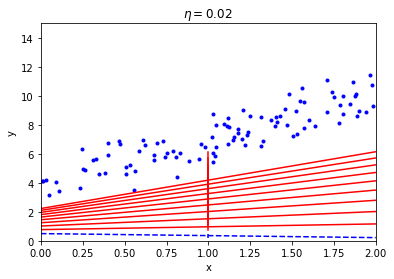

In [210]:
np.random.seed(42)
w = np.random.randn(2, 1)
plot_gradient_descent(w, eta=0.02, w_path=w_path)

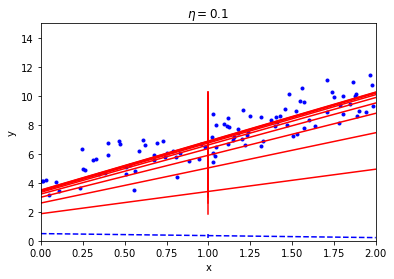

In [211]:
plot_gradient_descent(w, eta=0.1, w_path=w_path)

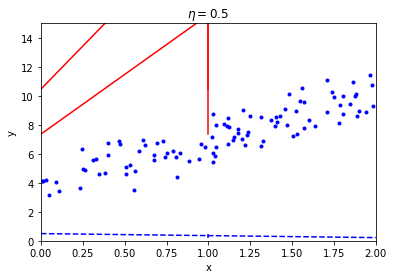

In [212]:
plot_gradient_descent(w, eta=0.5)

## Linear regression with stochastic gradient descent

Gradient descent (also called Batch gradient descent) uses full training set to update the weights. This may not be appropriate for large datasets. Stochastic gradient descent is a variant of gradient descent that uses a mini-batch of training examples to update the weights. The mini-batch size is set to a fixed value, and the weights are updated after each mini-batch. The stochastic gradient descent algorithm is similar to gradient descent i.e.:
$$
\pmb{w}_{i+1} = \pmb{w}_{i} - \eta \nabla_{\pmb{w}} MSE(\pmb{w}_{i})
$$
with the differece that the weight are updated using a mini-batch of training examples $\pmb{X}_{batch}$ instead of the full training set $\pmb{X}$ i.e.:
$$
\nabla_{\pmb{w}} MSE(\pmb{w}_{i}) = \frac{2}{m} \pmb{X}_{batch}^T \pmb{X}_{batch} \pmb{w}_{i} - \pmb{X}_{batch}^T \pmb{y}_{batch}
$$

In [213]:
# Function to schedule the learning rate
def schedule_eta(x):
    return 5 / (x + 50)

In [214]:
# Stochastic Gradient Descent function
w_path_sgd = []
def plot_stochastic_gradient_descent(w, epochs, w_path_sgd=None):
    plt.plot(X, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y")
    for epoch in range(epochs):
        for i in range(m):
            if epoch == 0 and i < 20:
                y_predict = X_test_mod.dot(w)
                style = "r-" if i > 0 else "b--"
                plt.plot(X_test_mod, y_predict, style)
            # Randomly select a training example
            random_index = np.random.randint(m)
            X_batch = X_mod[random_index:random_index + 1]
            y_batch = y[random_index:random_index + 1]
            # Calculate the gradients
            grads = (2 / m) * X_batch.T.dot(X_batch.dot(w) - y_batch)
            # Get the current learning rate
            eta = schedule_eta(epoch * m + i)
            # Update the weights
            w = w - eta * grads
            # Store the weights after each epoch
            if w_path_sgd is not None:
                w_path_sgd.append(w)
    plt.axis([0, 2, 0, 15])

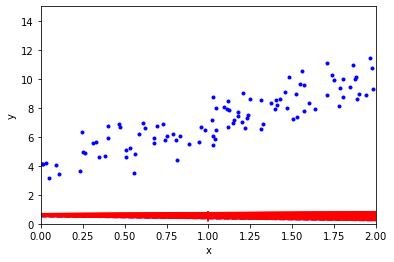

In [215]:
np.random.seed(42)
w = np.random.randn(2, 1)
m = len(X_mod)
epochs = 50
plot_stochastic_gradient_descent(w, epochs=epochs)